<a href="https://colab.research.google.com/github/SKC9372/Prescription-Label-Reading/blob/main/Prescription_label_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install paddlepaddle

In [ ]:
!pip install paddleocr

In [ ]:
!pip install gTTS

In [ ]:
!pip install gradio

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

# Initialize the PaddleOCR model with English language and angle classification
ocr_model = PaddleOCR(lang="en", use_angle_cls=True)

[2024/09/29 09:52:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
# Giving the path to image
image_path = r'/content/pres_4.jpeg'

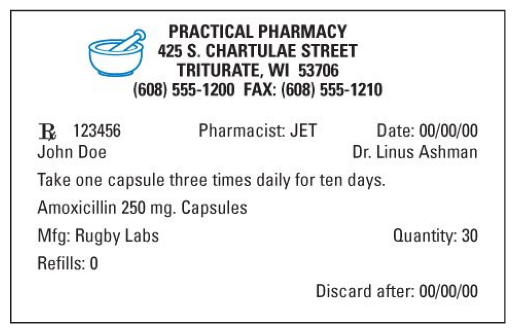

In [ ]:
# Open the image
img = Image.open(image_path)

# Display the image without axes
plt.imshow(img)
plt.axis('off')  # Disable axis display
plt.show()  # Ensure the image is shown

In [ ]:
# Print the image size (width, height)
print(f"Image size: {img.size}")

# Print the image mode (e.g., 'RGB', 'L', etc.)
print(f"Image mode: {img.mode}")

Image size: (482, 306)
Image mode: RGB


In [ ]:
def preprocess(image_path):
    """
    Preprocess the image by enhancing its contrast and sharpness.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        np.ndarray: Preprocessed image as a NumPy array.
    """
    # Open the image
    image = Image.open(image_path)

    # Enhance contrast
    contrast = ImageEnhance.Contrast(image)
    image = contrast.enhance(0.7)  # Adjust contrast

    # Enhance sharpness
    sharpness = ImageEnhance.Sharpness(image)
    image = sharpness.enhance(2)  # Adjust sharpness

    # Display the processed image
    plt.imshow(image)
    plt.axis('off')  # Disable axis display

    # Convert the image to a NumPy array
    image_np = np.array(image)

    return image_np


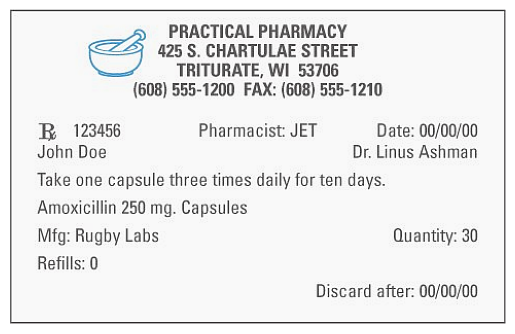

In [ ]:
image = preprocess(image_path)

In [ ]:
# Font path from the paddleocr for english
font = r'/content/PaddleOCR/doc/fonts/latin.ttf'

In [ ]:
# Calling the OCR Model
text = ocr_model.ocr(image, cls=True)

[2024/09/29 09:54:04] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.15497946739196777
[2024/09/29 09:54:04] ppocr DEBUG: cls num  : 15, elapsed : 0.07844901084899902
[2024/09/29 09:54:07] ppocr DEBUG: rec_res num  : 15, elapsed : 2.9375722408294678


In [ ]:
text

[[[[[154.0, 14.0], [327.0, 14.0], [327.0, 28.0], [154.0, 28.0]],
   ('PRACTICALPHARMACY', 0.990277886390686)],
  [[[145.0, 33.0], [337.0, 33.0], [337.0, 47.0], [145.0, 47.0]],
   ('425S.CHARTULAE STREET', 0.9540854692459106)],
  [[[162.0, 53.0], [320.0, 53.0], [320.0, 66.0], [162.0, 66.0]],
   ('TRITURATE,WI53706', 0.9469751715660095)],
  [[[119.0, 70.0], [363.0, 70.0], [363.0, 86.0], [119.0, 86.0]],
   ('608555-1200 FAX:608555-1210', 0.9589410424232483)],
  [[[24.0, 108.0], [109.0, 106.0], [110.0, 126.0], [24.0, 128.0]],
   ('R123456', 0.9807358384132385)],
  [[[182.0, 109.0], [299.0, 108.0], [299.0, 125.0], [182.0, 126.0]],
   ('PharmacistJET', 0.9944123029708862)],
  [[[354.0, 108.0], [456.0, 110.0], [456.0, 127.0], [353.0, 125.0]],
   ('Date:00/00/00', 0.9802207946777344)],
  [[[25.0, 130.0], [95.0, 130.0], [95.0, 147.0], [25.0, 147.0]],
   ('John Doe', 0.9404972791671753)],
  [[[331.0, 131.0], [456.0, 131.0], [456.0, 147.0], [331.0, 147.0]],
   ('Dr.Linus Ashman', 0.98403900861740

In [ ]:
def ocr_bboxes(image_path, ocr_output, font):
    """
    Draws OCR bounding boxes, text, and scores on the image.

    Args:
        image_path (str): Path to the input image file.
        ocr_output (list): Output from the OCR model, containing bounding boxes, text, and scores.
        font (str): Path to the font file for text rendering.

    Returns:
        None
    """
    # Open the image
    image = Image.open(image_path)

    # Convert image to RGB mode if not already
    if image.mode != 'RGB':
        image = image.convert(mode='RGB')

    # Initialize lists for bounding boxes, text, and scores
    bboxes = []
    texts = []
    scores = []

    # Extract bounding boxes, text, and scores from OCR output
    for line in ocr_output:
        for item in line:
            bboxes.append(item[0])
            texts.append(item[1][0])
            scores.append(item[1][1])

    # Annotate the image with OCR results
    annotated_image = draw_ocr(image, bboxes, texts, scores, font_path=font)

    # Display the annotated image
    plt.imshow(annotated_image)
    plt.axis('off')  # Disable axis display
    plt.show()  # Ensure the plot is displayed



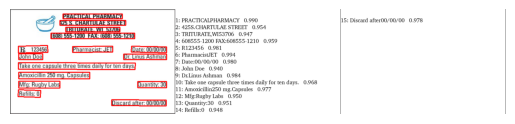

In [ ]:
ocr_bboxes(image_path,text,font)

In [ ]:
# List of keywords to search for
contain = ['mg', 'tablet', 'pills', 'quantity', 'qty', 'days', 'month', 'daily', 'hours', 'capsules']

# Initialize an empty list to store the matching text
output = []

# Iterate over each line in the text
for line in text:
    for item in line:
        extracted_text = item[1][0]
        # Check if any keyword is present in the extracted text (case-insensitive)
        if any(word in extracted_text.lower() for word in contain):
            output.append(extracted_text)


In [ ]:
final_text = ' '.join(output)

In [ ]:
from gtts import gTTS

# Create a gTTS object with the given text
tt = gTTS(text=final_text, lang='en', slow=False)

# Save the generated speech to an MP3 file
tt.save("output.mp3")

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np
from gtts import gTTS
from paddleocr import PaddleOCR

# Initialize the OCR model
ocr_model = PaddleOCR(lang="en", use_angle_cls=True)

def preprocess(image_path):
    """
    Preprocess the image by enhancing its contrast and sharpness.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        np.ndarray: Preprocessed image as a NumPy array.
    """
    # Open the image
    image = Image.open(image_path)

    # Enhance contrast
    contrast = ImageEnhance.Contrast(image)
    image = contrast.enhance(0.7)  # Adjust contrast

    # Enhance sharpness
    sharpness = ImageEnhance.Sharpness(image)
    image = sharpness.enhance(2)  # Adjust sharpness

    # Convert the image to a NumPy array
    image_np = np.array(image)

    return image_np

def text_extraction(image_path):
    """
    Extract text from the image using OCR.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        str: Extracted and filtered text as a single string.
    """
    # Preprocess the image
    image = preprocess(image_path)

    # Perform OCR on the image
    ocr_results = ocr_model.ocr(image, cls=True)

    # Keywords to look for in the extracted text
    keywords = ['mg', 'tablet', 'pills', 'quantity', 'qty', 'days', 'month', 'daily', 'hours', 'capsules']
    final_text = []

    # Extract relevant text from OCR results
    for line in ocr_results:
        for item in line:
            text = item[1][0]
            if any(word in text.lower() for word in keywords):
                final_text.append(text)

    return ' '.join(final_text)

def text_to_speech(text):
    """
    Convert text to speech and save it as an MP3 file.

    Args:
        text (str): The text to be converted to speech.

    Returns:
        str: Path to the saved MP3 file.
    """
    # Create a gTTS object and save to MP3
    tts = gTTS(text=text, lang='en', slow=True)
    output_file = "output.mp3"
    tts.save(output_file)

    return output_file

def final_model(image_path):
    """
    Complete workflow for extracting text from an image and converting it to speech.

    Args:
        image_path (str): Path to the input image file.

    Returns:
        str: Path to the saved MP3 file containing the speech.
    """
    # Extract text from the image
    text = text_extraction(image_path)

    # Convert extracted text to speech
    output = text_to_speech(text)

    return output


[2024/09/29 09:54:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
import gradio as gr

# Define the Gradio interface
interface = gr.Interface(
    fn=final_model,  # Function to be called
    inputs=gr.Image(type='filepath', label="Upload an Image"),  # Input image with a label
    outputs=gr.Audio(label="Generated Speech"),  # Output audio with a label
    title="Image to Speech Converter",  # Title of the interface
    description="Upload an image containing text, and this tool will extract the text and convert it to speech.",  # Description of the app
)

# Launch the Gradio interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cea2fabd6ce833541e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
